# CASE STUDY 3: Directing Customers to subscription product through APP behavior analysis

## Background

In today's market many companies have mobile presence. These companies provide free products or services in their mobile app to attract customers. Final goal is to make free customers into a paid members eg Netflix, Pandora Premium, YouTube Red etc. 

**Market**- Target audience here are the customers who installed and used company's free mobile app.

**Product**- Paid membership enhances on free versions and give more cool features to the customers. eg- YouTube red allows to leave app and still listening to the video.

**Project Goal**- To predict which users won't subscribe to the paid membership. So that more targeted marketing can be done to those 'not so interested' free members to make them into a paid user.

Following is more specific problem statement.

## Problem Statement

In this case study, employer is FinTech company. Their app allows customers to **track their finances in one place.** To attract customers, they give free version of the app (with some essential features locked and only available to paid members).

Company wants to identify the free app users who are less likely to be a paid member. This will allow company to give additional offers to them. Company wants it very targeted because they do not want to give the additional offer to everybody (especially the customers who will enroll anyways).

We have access to all customers app behavioral data. When it was installed, what features the customers were using more often etc. However, the data with premium features is available to the users for only 24 hours. 

In [735]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser # will be used to parse date-time field

In [736]:
dataset = pd.read_csv('appdata10.csv')
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


**Column information** 
* `user`- user id
* `first_open`- when user first opened the app
* `dayofweek`- 0 means Sunday and 6 is Saturday
* `hour`- hour of the day when they first opened the app
* `age`- age of the users
* `screen_list`- different screen names i
* `numscreens`- number of screen that appear in screen_list field
* `minigame`- if user played the minigame
* `like`- if user liked any particular feature
* `used_premium_feature`-some users used the free app but never used premium feature, whereas some did for free 24 hours
* `enrolled`- (**Target**)- whether they ended up in the paid product or NOT
* `enrolled_date`-day they actually enrolled (and some has enrolled long after 24 hours)

In [737]:
dataset.shape

(50000, 12)

In [738]:
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [739]:
# Hour column is in string. We need to fix this.
dataset['hour'] = dataset.hour.str.slice(1,3).astype('int')

In [740]:
# Distribution of the numerical columns
dataset.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


**Interpretation**
∆ Mean of `dayofweek` is 3, makes sense when the range is between 0 and 6 <br/>
∆ Mean `age` of using this app is 31 and mean `numofscreens` is 21 <br/>
∆ 10% of the users played `minigame` <br/>
∆ 17% of the users enjoyed the `premium_feature` that was free for 24 hours <br/>
∆ 62% people `enrolled` eventually <br/>
∆ ~17% has `liked` a particular feature <br/>

In [741]:
# Plotting
dataset2 = dataset.copy()
cols = ['user', 'screen_list', 'enrolled_date', 'first_open']
dataset2.drop(columns = cols, inplace=True)
print(dataset2.shape)

(50000, 8)


In [742]:
dataset2.head(2)

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0


/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


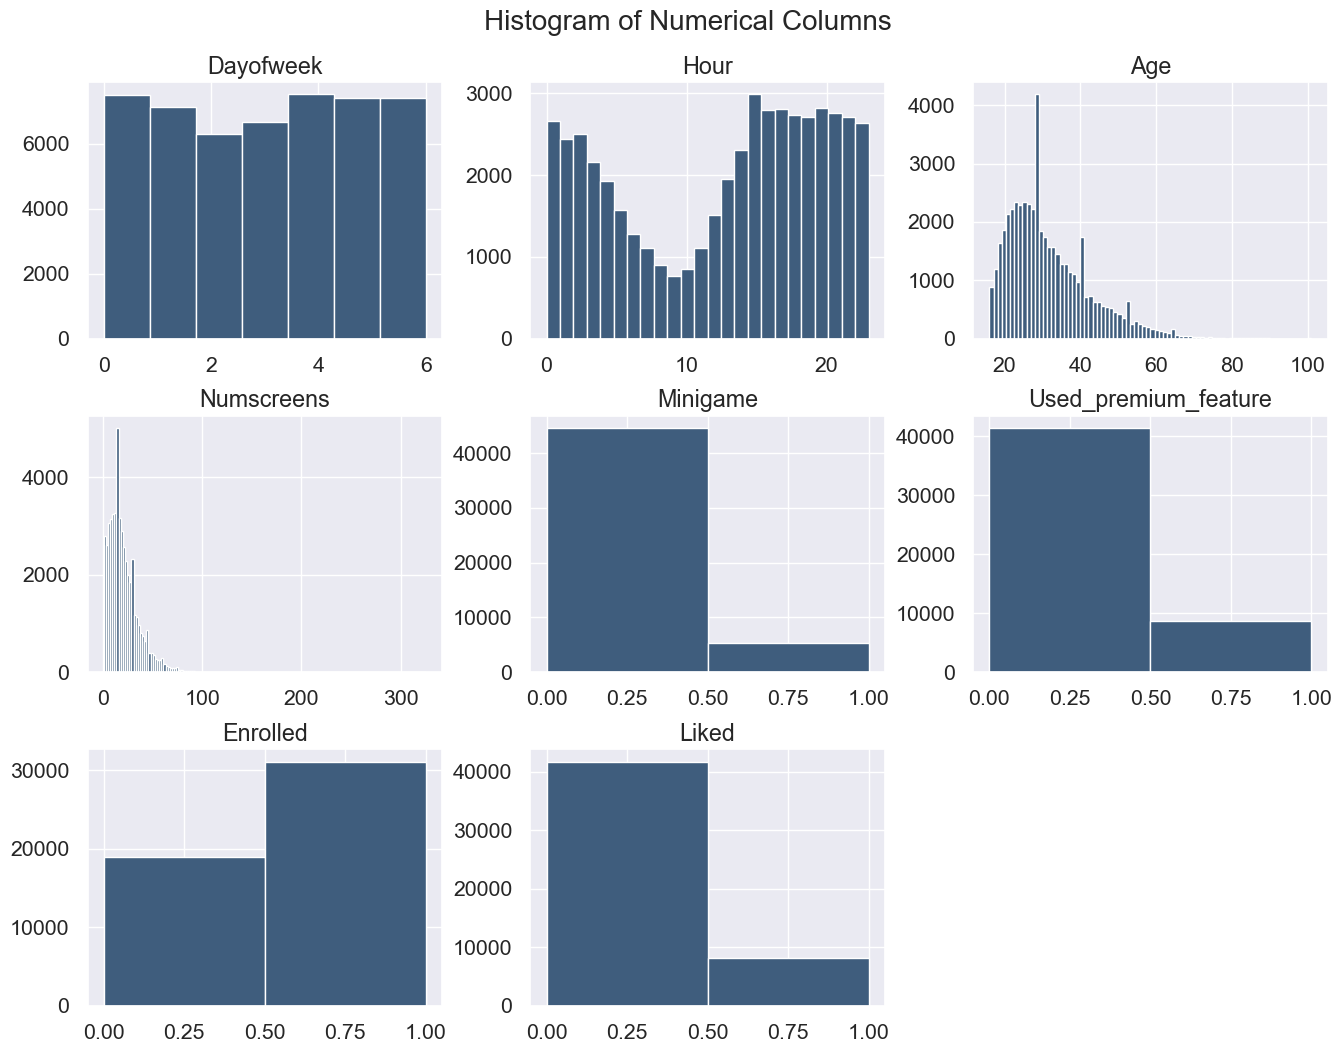

In [743]:
# EDA: Distribution of individual features
fig, axes = plt.subplots(3,3, figsize=(16,12), gridspec_kw = {'wspace':0.25, 'hspace':0.30})
axes = axes.ravel()
st = fig.suptitle('Histogram of Numerical Columns', fontsize = 20)
st.set_y(0.94)

for i in range(1, dataset2.shape[1]+1):
    vals = np.size(dataset2.iloc[:, i-1].unique())
    axes[i-1].hist(dataset2.iloc[:, i-1], bins=vals, color = '#3F5D7D')
    axes[i-1].set_title(dataset2.columns[i-1].capitalize())

#fig.delaxes(axes[7])
fig.delaxes(axes[8])
fig.tight_layout()

**Interpretation** <br/>
∆ No single `dayofweek` seems to be favored for installing the app<br/>
∆ In `hours` plot we observe people installing the app in middle of the night or early morning is much less, as we can guess<br/>
∆ `Age`- mostly even distribution with occassional peak around 30,40 and 50<br/>
∆ `Numscreen`- mostly even distribution<br/>
∆ `Minigame` & `Premium_feature`- most people donot play the minigame and use premium feature<br/>
∆ `Enrolled`- More people have enrolled<br/>
∆ `Liked`- Most people have not liked any feature

In [744]:
dataset2.drop(columns=['enrolled'], inplace=True)

(50000, 7)

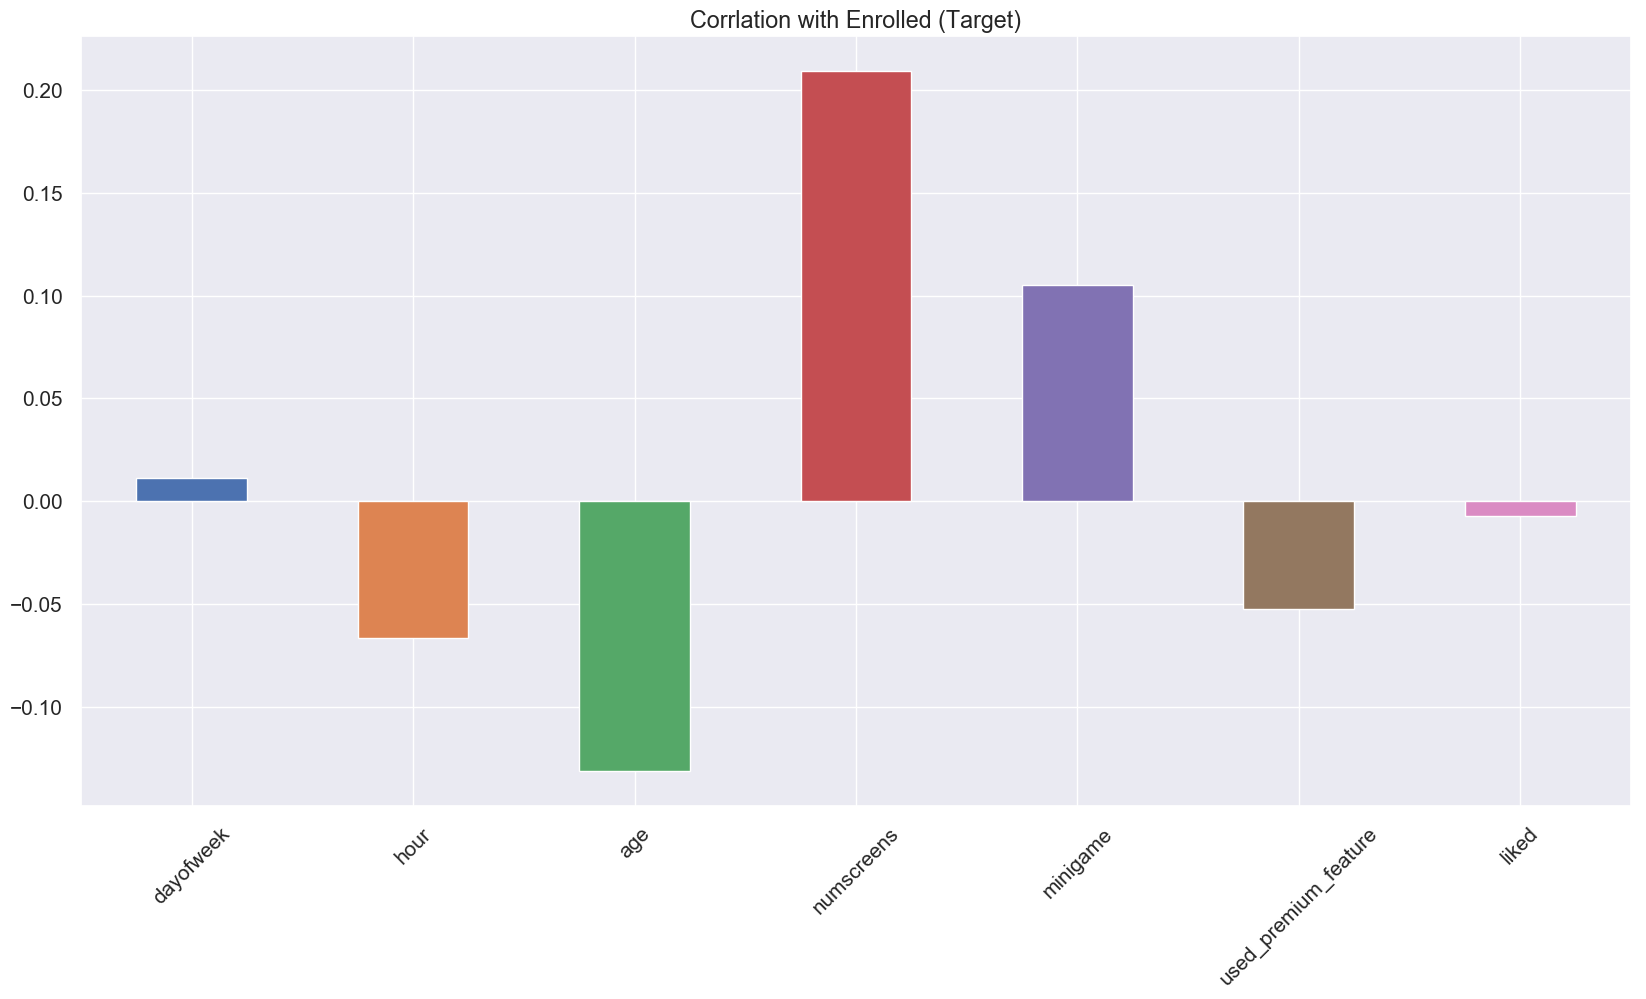

In [745]:
# EDA: Correlation with target
dataset2.corrwith(dataset['enrolled']).plot.bar(figsize=(20,10),
                                               title = 'Corrlation with Enrolled (Target)',
                                               fontsize = 15, rot = 45)
plt.style.use('seaborn')
dataset2.shape

**Interpretation** <br/>
∆ `dayofweek`- Seems later the day of the week, more likely to enroll. It might be because users have more time in weekends. But looking at such a small correlation, it might be also random.  <br/>
∆ `hour`- Negatively correlated. Meaning earlier the hour, more likely to enroll. <br/>
∆ `age`- Negatively correlated (highest). Older the person, less likely to enroll. Makes sense younger people are more active with app stuff and thus more likely to enroll. <br/>
∆ `numscreens`- Positively correlated (highest). Higher number means more engaged one customer is and thus more likely to enroll. <br/>
∆ `minigame`- Positively correlated. If one playing minigame means the customer is engaged and thus more likely to enroll. <br/>
∆ `used_premium_feature`- Negatively correlated. Interesting. Might be the people who has used premium features (free for 24 hours) didnot like what the app has to offer (or are not convinced about paying for it). And thus they are less likely to enroll.  <br/>
∆ `liked`- slightly related with enrolled (target) <br/>

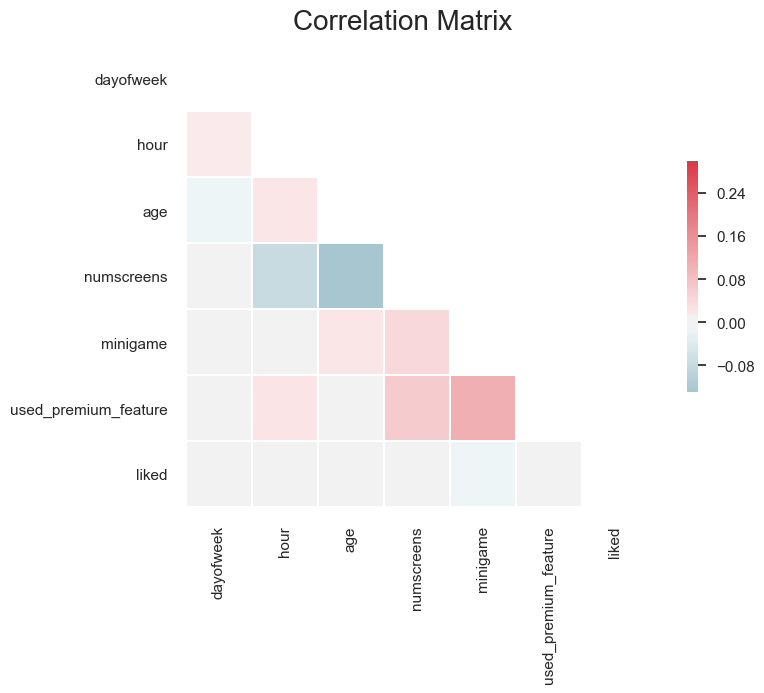

In [746]:
# EDA: Correlation matrix among all features will inform us relationship between features
sns.set(style='white', font_scale = 1)

# Correlation matrix
corr = dataset2.corr()
# Generate mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up matplotlib figure
f,ax = plt.subplots(figsize= (10,6))
f.suptitle('Correlation Matrix', x=0.5, y=.94, fontsize = 20)

# Generate custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink':.5})

We want the features to be independent of each other. That is what is assumed to be provided in the ML models. Therefore, we do not want the features to be dependent on one another (otherwise, it might arise multicollinearity problem). This can be confirmed through correlation matrix.<br/>

∆ `Age` and `Numscreens` seems to be strongly correlated (w.r.t. rest) in negative sense. That basically means younger people see a lot more screens in comparison to older people. But still it is not tahts trongly correlated that we could remove it.<br/>
∆ Similarly `Minigame` and `Used_premium_feature` seem to be positively correlated. However, still not strong enough to remove the features

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------**



Here we have to set a limit to how long we are going to wait to allow a free customer to be a paid member(`Enrolled`).
Suppose we set a limit of 1 week, then we can see whether model was accurate to predict a customer behavior (that whether he enrolled or not within a week). If we do not set a time limit, we will have to wait forever, because the dataset `Enrolled` column has users who has enrolled at random times after installing the software( it could be a day, week or year). That's why it is important to have a range on the target variable.

∆ To understand what time limit would be optimal, we need to have difference between `first_open` and `enrolled_date`. To do that, we need to do feature engineering.

In [747]:
# Feature Engineering_1 
print(dataset[['first_open', 'enrolled_date']].dtypes) # These need to be converted to datetime object

from dateutil import parser
dataset['first_open'] = [parser.parse(row) for row in dataset['first_open']]
# only convert in case of string inputs in case of 'enrolled_date', otherwise it will throw an error
dataset['enrolled_date'] = [parser.parse(row) if isinstance(row, str) else row for row in dataset['enrolled_date']]
dataset[['first_open', 'enrolled_date']].dtypes

first_open       object
enrolled_date    object
dtype: object


first_open       datetime64[ns]
enrolled_date    datetime64[ns]
dtype: object

In [748]:
dataset['difference'] = (dataset['enrolled_date'] - dataset['first_open']).astype('timedelta64[h]')

We can get the differences in seconds, minutes, to even years. But if we convert the difference to be timedelta-hour, unit of differences will always be hours. 

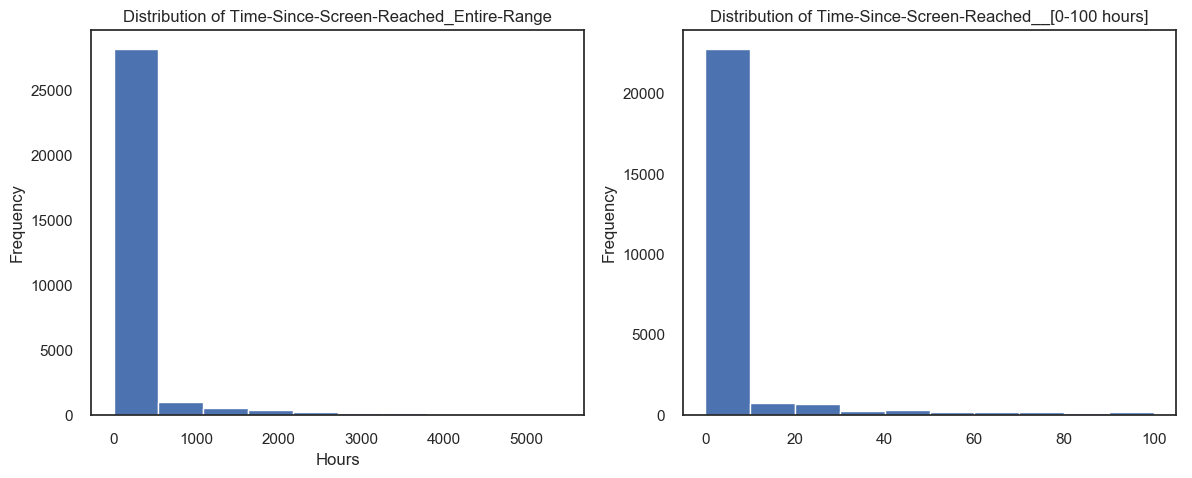

In [749]:
# Selecting optimal time 
# Entire range of difference
f,ax = plt.subplots(1,2, figsize = (14,5))
dataset["difference"].dropna().plot.hist(ax = ax[0])
ax[0].set_title('Distribution of Time-Since-Screen-Reached_Entire-Range')
ax[0].set_xlabel('Hours')

# Plot first 100 hours ofdifference
dataset["difference"].dropna().plot.hist(ax = ax[1], range = [0, 100])
ax[1].set_title('Distribution of Time-Since-Screen-Reached__[0-100 hours]')
plt.show()

∆ We clearly see majority of people has enrolled in first 500 hours. But we see it is extremely left skewed so might be most customers have enrolled within first 100 hours. 

∆ In the second plot  also, we see it is left skewed (right tailed). And most customers enroll within first 10 hours. To include most of the people we will consider optimal differnece hours as 48 hours i.e. 2 days. So we will only consider customers who enrolled within 48 hours. Rest of the customers (even if they enrolled later on) will be considered as 0 i.e. they never enrolled for model purpose.

In [750]:
filt = dataset['difference'] > 48
dataset.loc[filt, 'enrolled'] = 0

# Drop columns as we have already extracted information 
dataset = dataset.drop(columns=['enrolled_date', 'difference', 'first_open'])
dataset.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

There are too many screens. We are going to use a list of most popular screens provided by the company. Create a column for each column.

In [751]:
top_screens = pd.read_csv('top_screens.csv')
top_screens = top_screens['top_screens']

## Feature Engineering_2

# add ',' at the end, to account for the last screen in the column
dataset["screen_list"] = dataset['screen_list'] + ',' 
print(dataset.shape)

for screen in top_screens:
    dataset[screen] = dataset["screen_list"].str.contains(screen).astype(int)
    dataset['screen_list'] = dataset['screen_list'].str.replace(screen+",", "")
print(dataset.shape)

dataset['Other'] = dataset['screen_list'].str.count(",")
dataset = dataset.drop(columns=['screen_list'])
dataset.shape

(50000, 10)
(50000, 68)


(50000, 68)

Now there are too many columns. Also some columns belong under the same set like screen set, credit set etc. So customer going to a screen in a particular set, are highly likely to visit a similar screen in the same set. This will arise correlation among those columns. 

∆ Funnels are the group of screen that belong to the same set. Therefore, we can start funneling the similar columns.

In [752]:
# All savings screens will be funneled together
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
dataset['SavingsCount'] = dataset[savings_screens].sum(axis=1) # sum across each rows of savings screen

# All credit screens will be funneled together
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis=1) # sum across each rows of credit screens

# All CC1 screens will be funneled together
cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1) # sum across each rows of CC1 screens

# All loan screens will be funneled together
loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1) # sum across each rows of loan screens

# drop columns
dataset = dataset.drop(columns=savings_screens)
dataset = dataset.drop(columns=cm_screens)
dataset = dataset.drop(columns=cc_screens)
dataset = dataset.drop(columns=loan_screens)

# Save dataset
dataset.to_csv('new_appdata10.csv', index = False)

print(dataset.shape)
dataset.describe()
# dataset.dtypes

(50000, 50)


,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMCount,CCCount,LoansCount
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000,3.000000


In [753]:
# Data Pre-Processing

# Splitting into Independent and Response Variables
target = dataset["enrolled"] 
dataset = dataset.drop(columns="enrolled")

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, target,
                                                    test_size = 0.2,
                                                    random_state = 0)

`user` column is just an id or identifier of the customer. We should not feed this to model as it do not have any impact to the model. However, it is going to be important after the prediction is done as we need to associate the prediction with the `user` id. Therefore, we will save it before it is removed.

In [754]:
# Removing Identifiers
train_id = X_train['user']
X_train = X_train.drop(columns = 'user')
test_id = X_test['user']
X_test = X_test.drop(columns = 'user')

The values of each column is in different scale. Thus columns with higher absolute values will have more impact/influence on the model. This will adversely impact efficiency of the model prediction. Therefore, we need to perform feature scaling to the dataset to normalize all values.

In [755]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns#.values
X_test2.columns = X_test.columns#.values
X_train2.index = X_train.index#.values
X_test2.index = X_test.index#.values
X_train = X_train2
X_test = X_test2
X_train.head()

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:459: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMCount,CCCount,LoansCount
20330,-0.504961,1.000837,0.025525,-1.026726,-0.346830,2.186018,2.246319,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.147303,-0.260877,-0.763372,-0.289185,1.785389
17532,-0.997389,1.135280,-0.898034,1.328829,2.883254,-0.457453,-0.445173,0.962262,1.550753,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.839740,-0.260877,0.057524,-0.289185,0.309800
45819,-1.489818,-1.150250,-0.528611,4.066366,2.883254,-0.457453,-0.445173,-1.039218,1.550753,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.260877,0.878421,1.336593,1.785389
34807,0.479896,0.059736,-0.620967,0.182883,2.883254,-0.457453,-0.445173,0.962262,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.260877,-0.763372,-0.289185,0.309800
31888,-0.012532,0.463065,1.687932,-0.644744,-0.346830,-0.457453,-0.445173,0.962262,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.875753,-0.260877,0.878421,-0.289185,-1.165789


In [756]:
# Model Building 

# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l1')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


`penalty=l1` is added. This will change typical logistic regression model to `l1` regularization model. We saw during feature engineering a lot of screens are similar. So we funneled similar screen to a set. Now sets could be correlated too. (For example- loan screen could be correlated with credit screen, i.e. people visiting loan screen are also visiting credit screen). This correlation is NOT good for model efficiency.

**∆** Suppose there is a screen that is always visited before enrolling. So that screen could be highly correlated with target `Enrolled` and thus that feature or screen will have higher coefficient with logistic regression model. L1 regularization model prevents this by imposing penalities in case where one particular feature get a very high coefficient. 

In [757]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred)) # tp / (tp + fp)
print(recall_score(y_test, y_pred)) # tp / (tp + fn)
print(f1_score(y_test, y_pred))

0.7681
0.7618952017667135
0.7700892857142857
0.7659703300030276


**∆** **Accuracy is 76% which is decent. **


**∆** To make sure it is not because of overfitting we should look at **precision_score.** We get precision by dividing true positive with true positive and false positive. That tells, out of total predicted positives how many were really positive and how many were not. **Precision_score** score is also 76% which is as good as **accuracy** and **precision_score**, suggesting no overfitting.

**∆** **Recall_score** is achieved by dividing true positive by true positive and False negative. This tells us out of actual real positives, how many was predicted positive. This is also 77%, thus in accordance with the rest.


**∆** **F1_score** is the function of both precision and recall score. When one is smaller than other then **F1_score** is a good way to gurantee that our predictions are good. (As both precision and recall are close enough, we don't really need recall score). F1_score is also 76% that is also in accordance with the rest.

Test Data Accuracy: 0.7681


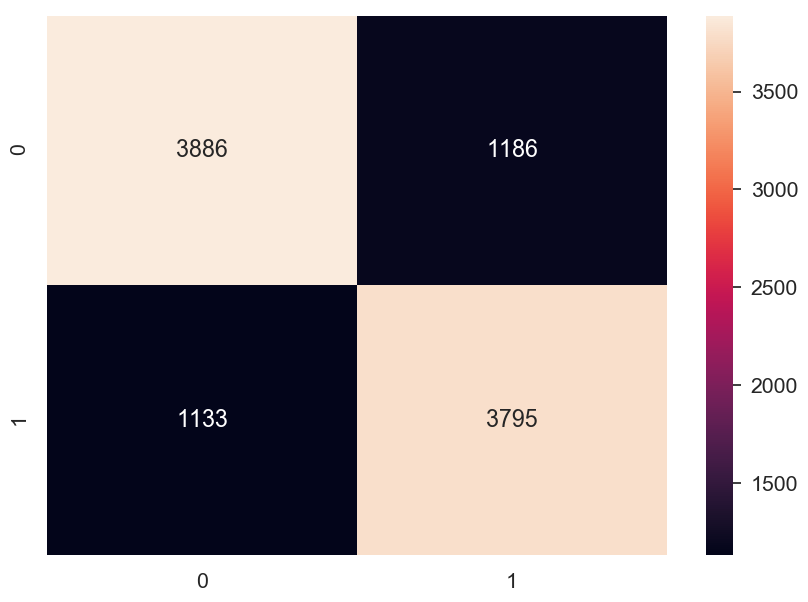

In [758]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [759]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

SVM Accuracy: 0.767 (+/- 0.009)


After cross validation we see our accuracy is still 76.7% with a very low standard deviation. This suggests model is very consistently accurate.

In [761]:
## Model Tuning (Hyper-parameter tuning)

## Grid Search (Round 1)
import time
from sklearn.model_selection import GridSearchCV

# Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# Select Regularization Method
penalty = ['l1', 'l2']

# Combine Parameters
hyper = {'C':C,
        'penalty':penalty}

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = hyper,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1,
                          verbose=1)
t0 = time.time()
grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))
print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   43.3s finished
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Took 43.86 seconds
0.7674
{'C': 0.01, 'penalty': 'l2'}


In [762]:
# Grid Search (Round 2)
# Create regularization hyperparameter space
C = [0.1, 0.5, 0.9, 1, 2, 5]
# Select Regularization Method
penalty = ['l1', 'l2']

# Combine Parameters
hyper = {'C':C,
        'penalty':penalty}

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = hyper,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1,
                          verbose = 1)
t0 = time.time()
grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))
print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   34.9s finished
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Took 35.45 seconds
0.767225
{'C': 0.5, 'penalty': 'l2'}


Now to summarize we will create a dataframe with user identifier (`test_identity`), actual result (`y_test`, whether that user actually enrolled or not) and predicted result (`y_pred`).

In [765]:
# Formatting Final Results
final_results = pd.concat([y_test, test_id], axis = 1).dropna()
final_results['predicted_result'] = y_pred
# reorder columns
final_results = final_results[['user', 'enrolled', 'predicted_result']].reset_index(drop=True)
final_results.head()

,user,enrolled,predicted_result
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1


From this dataframe we can see which customers are likely to get enrolled by looking at `user_identifier` and `predicted_result`. In case of real world data, we will not have any `enrolled` data. Thus based on `predicted_result` company will target the more stubborn customers who are less likely to be a paid customer with an offer that they can not refuse.